Ketua: 20-114 Irham Hamed Ayani

Anggota: 20-041 Chendy Tri Wardani

link github: https://github.com/HamedAyani114/kelompokpro

In [37]:
import numpy as np
import pandas as pd

In [74]:
df_data = pd.read_csv('GGRM.JK.csv')
df_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5493,2023-06-08,28100.0,28750.0,27725.0,28000.0,28000.0,1742300.0
5494,2023-06-09,28000.0,28050.0,27300.0,27400.0,27400.0,2684200.0
5495,2023-06-12,27425.0,28250.0,27400.0,27900.0,27900.0,2627400.0
5496,2023-06-13,27900.0,28125.0,27750.0,28000.0,28000.0,1284700.0
5497,2023-06-14,0.0,0.0,0.0,27600.0,27600.0,0.0


In [75]:
df_close= df_data['Close']

df_close = df_close[df_close!=0]

<AxesSubplot: xlabel='Date'>

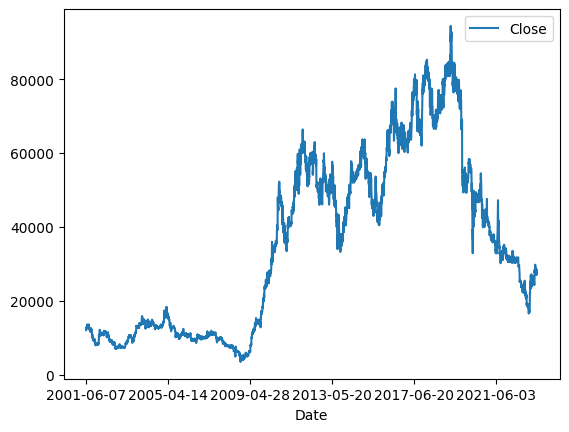

In [77]:
import matplotlib.pyplot as plt

#path = #enter the path of your csv file

df_data.plot(x='Date', y='Close')

In [80]:
X = df_close.values

X

array([12100., 12050., 12200., ..., 27900., 28000., 27600.])

In [81]:
# transform univariate time series to supervised learning problem
from numpy import array
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
    # find the end of this pattern
        end_ix = i + n_steps
    # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
    # gather input and output parts of the pattern
        # print(i, end_ix)
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [82]:
n_steps = 9
X, y = split_sequence(df_close, n_steps)

In [83]:
# column names to X and y data frames
df_X = pd.DataFrame(X, columns=['t-'+str(i) for i in range(n_steps-1, -1,-1)])
df_y = pd.DataFrame(y, columns=['t+1 (prediction)'])

# concat df_X and df_y
df = pd.concat([df_X, df_y], axis=1)

In [96]:
print(df.isna().sum())

t-8                 0
t-7                 0
t-6                 0
t-5                 0
t-4                 0
t-3                 0
t-2                 0
t-1                 0
t-0                 0
t+1 (prediction)    0
dtype: int64


In [85]:
df.dropna(inplace=True)

In [105]:
print(df.isna().sum())

t-8                 0
t-7                 0
t-6                 0
t-5                 0
t-4                 0
t-3                 0
t-2                 0
t-1                 0
t-0                 0
t+1 (prediction)    0
dtype: int64


In [87]:
df.head(3)

,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t-0,t+1 (prediction)
0,12100.0,12050.0,12200.0,12950.0,12650.0,12750.0,12500.0,12700.0,12800.0,12850.0
1,12050.0,12200.0,12950.0,12650.0,12750.0,12500.0,12700.0,12800.0,12850.0,12950.0
2,12200.0,12950.0,12650.0,12750.0,12500.0,12700.0,12800.0,12850.0,12950.0,13650.0


In [99]:
df.values[:,:-1].shape

(5469, 9)

In [119]:
df.values[:,-1].reshape(-1,1).shape


(5469, 1)

In [107]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
X_norm= scaler.fit_transform(df.values[:,:-1])
# y_norm= scaler.fit_transform(df_y)

In [110]:
X_norm

array([[0.09460946, 0.09405941, 0.09570957, ..., 0.0990099 , 0.10121012,
        0.10231023],
       [0.09405941, 0.09570957, 0.1039604 , ..., 0.10121012, 0.10231023,
        0.10286029],
       [0.09570957, 0.1039604 , 0.10066007, ..., 0.10231023, 0.10286029,
        0.1039604 ],
       ...,
       [0.26485149, 0.26292629, 0.26347635, ..., 0.27062706, 0.26952695,
        0.26292629],
       [0.26292629, 0.26347635, 0.25852585, ..., 0.26952695, 0.26292629,
        0.26842684],
       [0.26347635, 0.25852585, 0.27585259, ..., 0.26292629, 0.26842684,
        0.26952695]])

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, df.values[:,-1].reshape(-1,1), test_size=0.2, random_state=0)

In [122]:
df_train = pd.DataFrame(X_train, columns=['t-'+str(i) for i in range(n_steps-1, -1,-1)])
df_train['t+1 (prediction)'] = y_train
df_train.tail(3)

,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t-0,t+1 (prediction)
4372,0.069307,0.068757,0.068207,0.069857,0.067107,0.069307,0.066007,0.061606,0.061056,9100.0
4373,0.587459,0.599560,0.603960,0.627613,0.638064,0.638614,0.648515,0.632563,0.627063,62000.0
4374,0.612761,0.618262,0.618262,0.613311,0.603960,0.608911,0.595710,0.596810,0.588559,58250.0


In [49]:
# df_train.to_csv('dftrain.csv', index=False)

In [123]:
print(df_train.isna().sum())

t-8                 0
t-7                 0
t-6                 0
t-5                 0
t-4                 0
t-3                 0
t-2                 0
t-1                 0
t-0                 0
t+1 (prediction)    0
dtype: int64


In [ ]:
df.dropna(inplace=True)

In [136]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
# fit the model
from sklearn.neighbors import KNeighborsRegressor

model_randF = RandomForestRegressor()


model_knn = KNeighborsRegressor(n_neighbors=4)


In [126]:
y_train.shape

(4375, 1)

In [137]:
model_randF.fit(X_train, y_train)
model_knn.fit(X_train, y_train)
y_pred_randF=model_randF.predict(X_test)
y_pred=model_knn.predict(X_test)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25144\1254946795.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_randF.fit(X_train, y_train)


In [ ]:
df_data.shape

(265, 7)

In [138]:
from sklearn.neural_network import MLPRegressor

model_mlpreg=MLPRegressor()
model_mlpreg.fit(X_train, y_train)
y_pred_mlpreg=model_mlpreg.predict(X_test)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [139]:
# mean absolute percentage error
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)

0.019818649673982794

In [140]:
# mean absolute percentage error
from sklearn.metrics import mean_absolute_percentage_error


mean_absolute_percentage_error(y_test, y_pred_randF)

0.016776969729291352

In [141]:
# mean absolute percentage error
from sklearn.metrics import mean_absolute_percentage_error


mean_absolute_percentage_error(y_test, y_pred_mlpreg)

0.7637580054099568

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


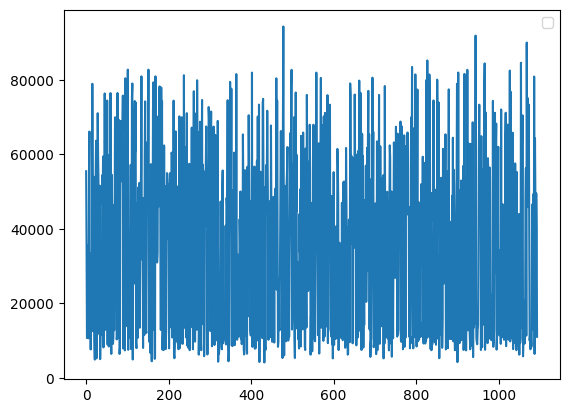

In [135]:
plt.plot(y_test,)
# plt.plot(y_pred, )
plt.legend()
plt.show()

In [ ]:
import pickle

pickle.dump(model_knn, open('model_knn.pkl', 'wb'))